# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
"""
Function to build the url by city name

param1: city_name: the cityname

returns: the fully formed url for the OpenWeatherMap API with the api_key and the city_name and units as imperial as query params
"""
def build_url_by_city_name(city_name):
    base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}'
    return f"{base_url}&q={city_name}&units=imperial"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create an empty list
l = []

start_msg = 'Beginning Data Retrieval'
end_msg = 'Data Retrieval Complete'
print(start_msg)
print('-'*len(start_msg))

batch_size = 60
wait_time = 60
record_number = 0
record_group_number = 0

for i in range(0, len(cities), batch_size):
    record_group_number = record_group_number + 1
    for j in range(i, batch_size + i): 
        if j < len(cities):
            record_number = j + 1
            json_data = requests.get(build_url_by_city_name(cities[j])).json()
            if json_data['cod'] == '429': 
                break
            elif json_data['cod'] == '404':
                print(f"City not found. Skipping {cities[j]} ...") 
            else:
                print(f"Processing Record {record_number} of Set {record_group_number} | {json_data['name']}")
                #Create an empty dictionary to store what we want from the json_data 
                d = {}
                d['id'] = json_data['id']
                d['City'] = json_data['name']
                d['Country'] = json_data['sys']['country']
                d['Date'] = json_data['dt']
                d['Humidity'] = json_data['main']['humidity']
                d['Lat'] = json_data['coord']['lat']
                d['Lng'] = json_data['coord']['lon']
                d['Cloudiness'] = json_data['clouds']['all']
                d['Max Temp'] = json_data['main']['temp_max']
                d['Wind Speed'] = json_data['wind']['speed']
                l.append(d)
    #sleep for 1 minute between batch calls
    time.sleep(wait_time)

print('-'*len(end_msg)) 
print(end_msg)
print('-'*len(end_msg))                  

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | Rikitea
Processing Record 2 of Set 1 | Negara
Processing Record 3 of Set 1 | Mataura
Processing Record 4 of Set 1 | Ushuaia
Processing Record 5 of Set 1 | Butaritari
Processing Record 6 of Set 1 | Albany
Processing Record 7 of Set 1 | Norman Wells
Processing Record 8 of Set 1 | Cabo San Lucas
City not found. Skipping taolanaro ...
Processing Record 10 of Set 1 | Montmagny
Processing Record 11 of Set 1 | Katsuura
Processing Record 12 of Set 1 | Chumikan
Processing Record 13 of Set 1 | Ancud
Processing Record 14 of Set 1 | Vaini
City not found. Skipping tumannyy ...
Processing Record 16 of Set 1 | Lasa
Processing Record 17 of Set 1 | Qaanaaq
Processing Record 18 of Set 1 | Sharjah
Processing Record 19 of Set 1 | Hillsborough
City not found. Skipping barentsburg ...
Processing Record 21 of Set 1 | Avarua
Processing Record 22 of Set 1 | Lebu
Processing Record 23 of Set 1 | Port Blair
Processing Record 24 of Se

Processing Record 199 of Set 4 | Kholodnyy
Processing Record 200 of Set 4 | Celestun
Processing Record 201 of Set 4 | Arambagh
Processing Record 202 of Set 4 | Byron Bay
Processing Record 203 of Set 4 | Lavrentiya
Processing Record 204 of Set 4 | Saint George
Processing Record 205 of Set 4 | Nantucket
Processing Record 206 of Set 4 | Staroaleyskoye
Processing Record 207 of Set 4 | Iskateley
Processing Record 208 of Set 4 | Turan
Processing Record 209 of Set 4 | Bambous Virieux
Processing Record 210 of Set 4 | Nanortalik
Processing Record 211 of Set 4 | Zenzeli
Processing Record 212 of Set 4 | Poopo
Processing Record 213 of Set 4 | Manaus
Processing Record 214 of Set 4 | Sinegorye
Processing Record 215 of Set 4 | Buraydah
Processing Record 216 of Set 4 | Shiloh
Processing Record 217 of Set 4 | Geraldton
Processing Record 218 of Set 4 | Candelaria
Processing Record 219 of Set 4 | Kampong Cham
Processing Record 220 of Set 4 | Hofn
Processing Record 221 of Set 4 | Hasaki
Processing Record 

Processing Record 394 of Set 7 | Broken Hill
Processing Record 395 of Set 7 | Esmeraldas
Processing Record 396 of Set 7 | Nadadores
Processing Record 397 of Set 7 | Nabire
Processing Record 398 of Set 7 | Gunnedah
Processing Record 399 of Set 7 | Bowen
Processing Record 400 of Set 7 | Mount Gambier
Processing Record 401 of Set 7 | Vung Tau
Processing Record 402 of Set 7 | Touros
Processing Record 403 of Set 7 | Jaguaruna
Processing Record 404 of Set 7 | Rio Gallegos
City not found. Skipping krasnoselkup ...
Processing Record 406 of Set 7 | Det Udom
Processing Record 407 of Set 7 | Kisangani
Processing Record 408 of Set 7 | Srednekolymsk
City not found. Skipping zachagansk ...
Processing Record 410 of Set 7 | Bhakkar
Processing Record 411 of Set 7 | Pacific Grove
City not found. Skipping ijaki ...
Processing Record 413 of Set 7 | Liseleje
Processing Record 414 of Set 7 | Ampanihy
Processing Record 415 of Set 7 | Iqaluit
Processing Record 416 of Set 7 | Abong Mbang
Processing Record 417 

Processing Record 590 of Set 10 | Udachnyy
Processing Record 591 of Set 10 | Erenhot
Processing Record 592 of Set 10 | Lamar
City not found. Skipping cape elizabeth ...
Processing Record 594 of Set 10 | Puerto Escondido
Processing Record 595 of Set 10 | Kantang
Processing Record 596 of Set 10 | Gamba
Processing Record 597 of Set 10 | Vaitape
City not found. Skipping macaboboni ...
Processing Record 599 of Set 10 | Nhulunbuy
Processing Record 600 of Set 10 | Cockburn Town
Processing Record 601 of Set 11 | Makat
Processing Record 602 of Set 11 | Nouadhibou
Processing Record 603 of Set 11 | Rodrigues Alves
Processing Record 604 of Set 11 | Bikin
City not found. Skipping ardistan ...
-----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(l)
df.to_csv(output_data_file, index=False)
#df = pd.read_csv(output_data_file)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,id
0,Rikitea,0,PF,1543620413,98,-23.12,-134.97,78.48,13.62,4030556
1,Negara,76,ID,1543620413,100,-8.36,114.62,77.99,2.59,1634266
2,Mataura,64,NZ,1543620413,84,-46.19,168.86,66.02,4.50,6201424
3,Ushuaia,75,AR,1543618800,70,-54.81,-68.31,46.40,21.92,3833367
4,Butaritari,24,KI,1543620414,100,3.07,172.79,84.24,6.85,2110227


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
"""
Function to build the scatter plot based on the param values passed in

param1: x_axis
param2: y_axis
param3: title
param4: xlabel
param5. ylabel

"""
def build_scatter_plot(x_axis, y_axis, title, xlabel, ylabel):
    todays_date = datetime.date.today().strftime('%m/%d/%Y')
    plt.scatter(x=x_axis, y=y_axis, alpha=.75, edgecolors='black', linewidths=.75)
    plt.title(f"{title} ({todays_date})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

#### Latitude vs. Temperature Plot

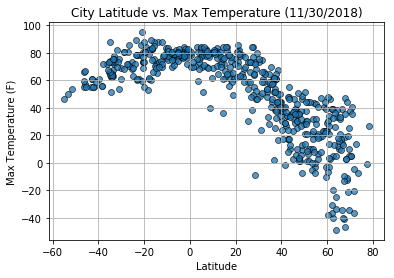

In [7]:
build_scatter_plot(x_axis=df['Lat']
                   , y_axis=df['Max Temp']
                   , title='City Latitude vs. Max Temperature'
                   , xlabel='Latitude'
                   , ylabel='Max Temperature (F)'
                  )  

# Save Figure
plt.savefig("./images/WeatherPy_latitude_v_max_temperature.png")

# Show Figure
plt.show()

#### Latitude vs. Humidity Plot

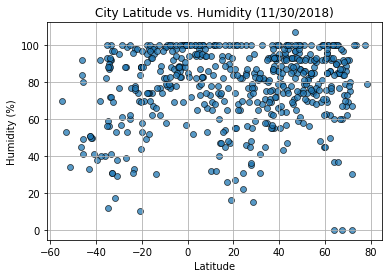

In [8]:
build_scatter_plot(x_axis=df['Lat']
                   , y_axis=df['Humidity']
                   , title='City Latitude vs. Humidity'
                   , xlabel='Latitude'
                   , ylabel='Humidity (%)'
                  )
# Save Figure
plt.savefig("./images/WeatherPy_latitude_v_humidity.png")

# Show Figure
plt.show()

#### Latitude vs. Cloudiness Plot

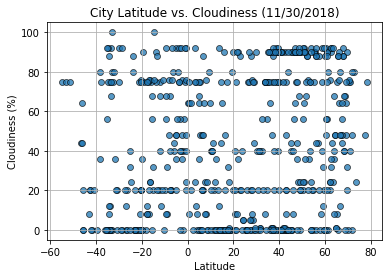

In [9]:
build_scatter_plot(x_axis=df['Lat']
                   , y_axis=df['Cloudiness']
                   , title='City Latitude vs. Cloudiness'
                   , xlabel='Latitude'
                   , ylabel='Cloudiness (%)'
                  ) 
# Save Figure
plt.savefig("./images/WeatherPy_latitude_v_cloudiness.png")

# Show Figure
plt.show()

#### Latitude vs. Wind Speed Plot

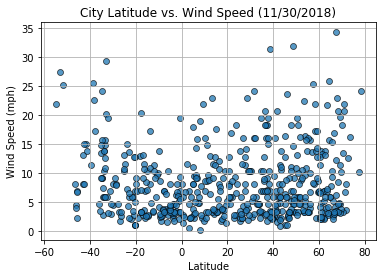

In [10]:
build_scatter_plot(x_axis=df['Lat']
                   , y_axis=df['Wind Speed']
                   , title='City Latitude vs. Wind Speed'
                   , xlabel='Latitude'
                   , ylabel='Wind Speed (mph)'
                  )  
# Save Figure
plt.savefig("./images/WeatherPy_latitude_v_wind_speed.png")

# Show Figure
plt.show()